In [9]:
import numpy as np
from scipy.signal import hilbert, chirp
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#sys.path.insert(1, r'C:\Users\smartin5\Repos\myNeurochat')
sys.path.insert(1, r'C:\Users\maolivei\neuro_sean\NeuroChaT')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from neurochat.nc_spike import NSpike
from neurochat.nc_lfp import NLfp

In [11]:
lfp= NLfp(system= 'Axona')
lfp.set_filename(r'F:\Chapter6\1B data_and_results\Data\ALL\MSL2-270417B-base_old.eeg5')

ValueError: N must be positive.

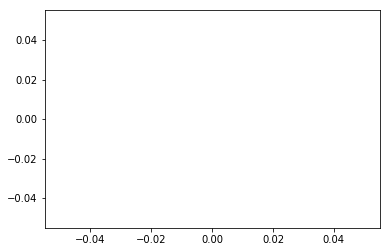

In [12]:
fs = lfp.get_sampling_rate()
duration = lfp.get_duration() 
x = lfp.get_lfp()
 
plt.plot(x) #plot the modulated signal
 
z= hilbert(x) #form the analytical signal
inst_amplitude = np.abs(z) #envelope extraction
inst_phase = np.unwrap(np.angle(z))#inst phase
inst_freq = np.diff(inst_phase)/(2*np.pi)*fs #inst frequency
 
#Regenerate the carrier from the instantaneous phase
regenerated_carrier = np.cos(inst_phase)
 
plt.plot(inst_amplitude,'r'); #overlay the extracted envelope
plt.title('Modulated signal and extracted envelope')
plt.xlabel('n')
plt.ylabel('x(t) and |z(t)|')
plt.subplot(2,1,2)
plt.plot(regenerated_carrier)
plt.title('Extracted carrier or TFS')
plt.xlabel('n')
plt.ylabel('cos[\omega(t)]')